In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

In [2]:
# 플랏 스타일
plt.style.use('ggplot')

# - 표시 오류 해결
mpl.rcParams['axes.unicode_minus'] = False

# 한글폰트 굴림으로 설정
font_location = 'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname = font_location).get_name()
rc('font', family=font_name)
mpl.rcParams.update({'font.size': 15})

In [3]:
data = pd.read_excel('소매업태별_분기별판매액계절조정지수_2019_2020.xlsx')
data.set_index(keys='시점', drop=True, inplace=True)
process_data = pd.concat([pd.DataFrame(np.mean(data.iloc[0:4]), columns=['2019년 평균']).T, data.iloc[4:]], axis=0)
process_data.drop(labels='승용차 및 연료 소매점', axis=1, inplace=True)

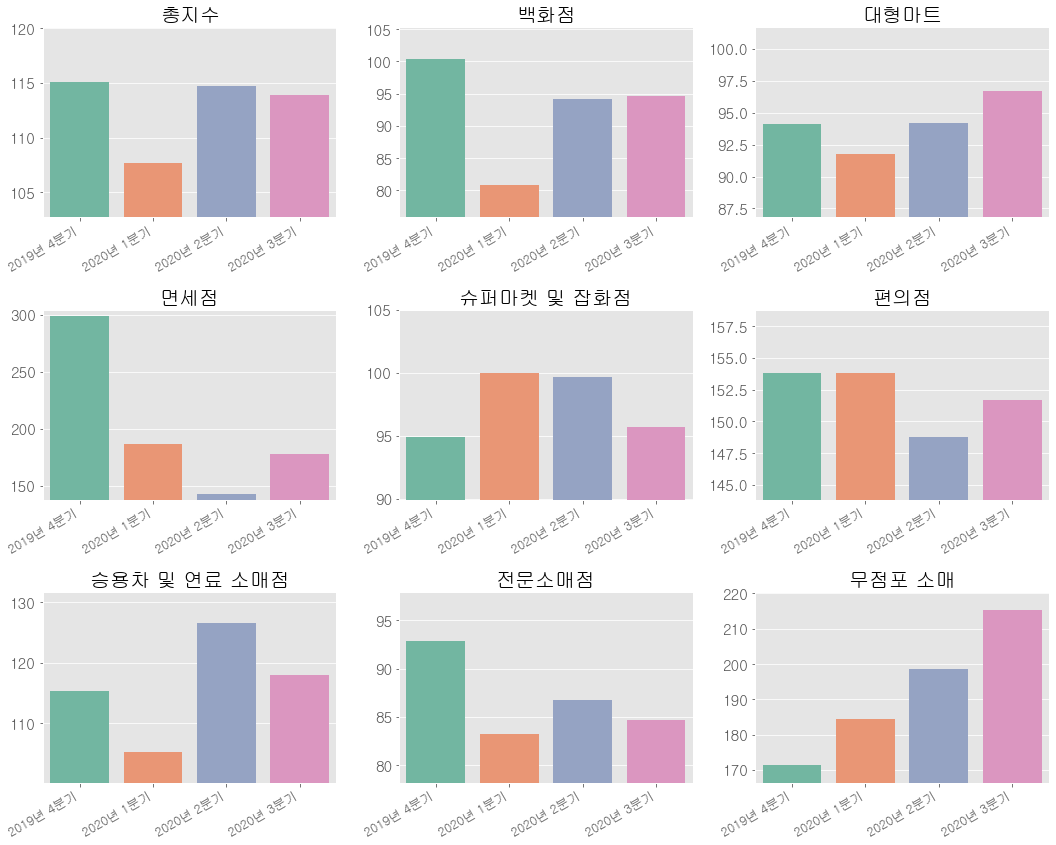

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i in range(len(axes)):
    sns.barplot(data.index[3:], data.iloc[3:, i], ax=axes[i], palette='Set2')
    axes[i].set_title(data.columns[i], fontsize=20)
    plt.setp(axes[i].get_xticklabels(), rotation=30, ha='right', fontsize=12.5)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_ylim((np.min(data.iloc[3:, i]) - 5, np.max(data.iloc[3:, i]) + 5))
    
plt.tight_layout()
plt.show()

1. 백화점

2020년 1분기는 2019년 4분기에 비해 20% 하락했지만 2분기에는 빠른 회복세를 보임

2. 대형마트

2020년 1분기는 코로나 쇼크를 받았지만 다른 소매업태에 비해 2019년 대비 가장 작은 감소폭을 가졌음

2, 3분기는 2019년 4분기보다 오히려 높음

3. 면세점

면세점은 모든 소매업태별 중에서 가장 큰 감소폭을 보여줌

면세점의 가장 큰 고객이 외국인, 특히 중국인이라는 점을 고려해봤을 때 코로나로 인한 입국 금지에 영향을 많이 받은 것으로 보임

4. 무점포소매

무점포소매는 2020년 3분기동안 유일하게 지속적인 증가를 보여주는 소매업태이다. 언택트 시대의 도래에 발맞춰 지속적인 판매 증가를 기록하고 있다.

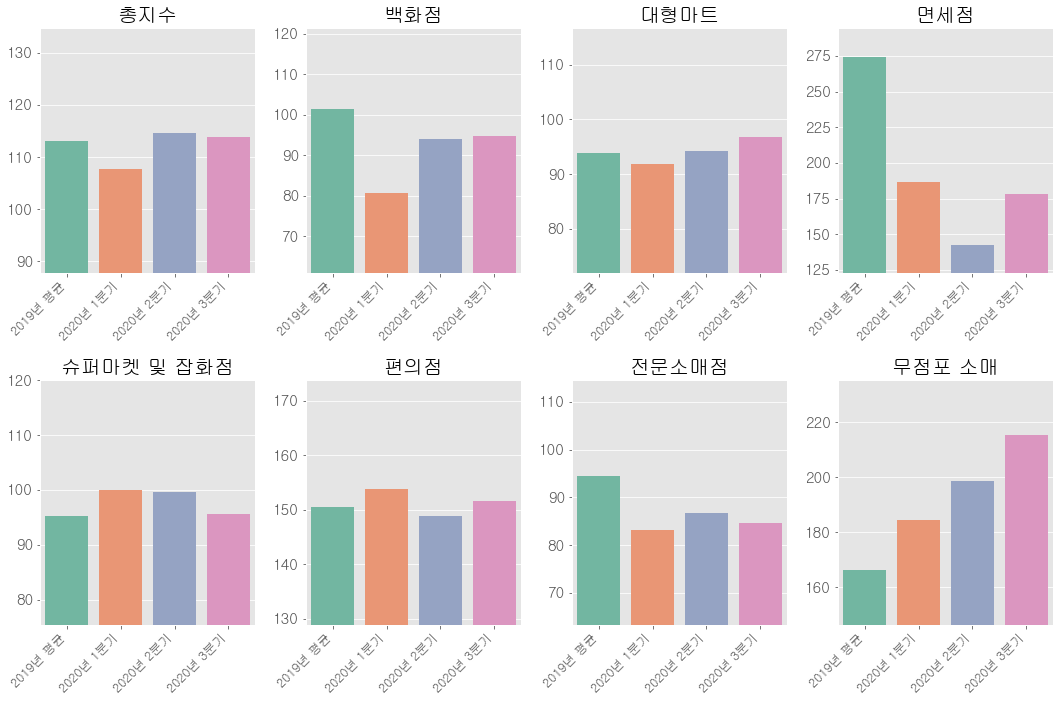

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.ravel()

for i in range(len(axes)):
    sns.barplot(process_data.index, process_data.iloc[:, i], ax=axes[i], palette='Set2')
    axes[i].set_title(process_data.columns[i], fontsize=20)
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right', fontsize=12.5)
    axes[i].set_ylabel('')
    axes[i].set_ylim((np.min(process_data.iloc[:, i]) - 20, np.max(process_data.iloc[:, i]) + 20))
    
plt.tight_layout()
plt.show()